In [ ]:
import os
import numpy
import pandas
import time
import random
import matplotlib
import sklearn.linear_model
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import scipy.stats
import matplotlib.offsetbox as offsetbox
from matplotlib.ticker import StrMethodFormatter
import imageio
import PIL
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from joblib import dump, load

def saver(fname):
    plt.savefig(fname+".png",bbox_inches="tight")

def legend(pos="bottom",ncol=3,extra=False):
    if pos=="bottom":
        extra = 0.15 if extra else 0
        plt.legend(bbox_to_anchor=(0.5,-0.2-extra), loc='upper center',facecolor="lightgray",ncol=ncol)
    elif pos=="side":
        plt.legend(bbox_to_anchor=(1.1,0.5), loc='center left',facecolor="lightgray",ncol=1)

def textbox(txt,fname=None):
    plt.figure(figsize=(1,1))
    plt.gca().add_artist(offsetbox.AnchoredText("\n".join(txt), loc="center",prop=dict(size=30)))
    plt.axis('off')
    if fname is not None:
        saver(fname)
    plt.show()
    plt.close()

In [ ]:
def getfile(location_pair,**kwargs): #tries to get local version and then defaults to google drive version
    (loc,gdrive)=location_pair
    try:
        out=pandas.read_csv(loc,**kwargs)
    except FileNotFoundError:
        print("local file not found; accessing Google Drive")
        loc = 'https://drive.google.com/uc?export=download&id='+gdrive.split('/')[-2]
        out=pandas.read_csv(loc,**kwargs)
    return out

In [ ]:
raw_data=("US_Gas_Data with season.csv","https://drive.google.com/file/d/1_U6DmeQvqGuLhSmAk_EHWnBnFL1nxjiF/view?usp=sharing")

In [ ]:
data_raw=getfile(raw_data)
data_raw.head()

local file not found; accessing Google Drive


,Date for US Imports and Exports,Weekly U.S. Exports of Crude Oil and Petroleum Products (Thousand Barrels per Day),Weekly U.S. Exports of Crude Oil (Thousand Barrels per Day),Weekly U.S. Exports of Total Petroleum Products (Thousand Barrels per Day),Date for Retail Gas Price,Weekly U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon),Season
0,9-Nov-01,10772,9639,1133,12-Nov-01,1.224,autumn
1,16-Nov-01,10243,8879,1364,19-Nov-01,1.208,autumn
2,23-Nov-01,9576,8187,1389,26-Nov-01,1.168,autumn
3,30-Nov-01,11170,9856,1314,3-Dec-01,1.149,autumn
4,7-Dec-01,9885,8966,919,10-Dec-01,1.136,winter


In [ ]:
data_raw

,Date for US Imports and Exports,Weekly U.S. Exports of Crude Oil and Petroleum Products (Thousand Barrels per Day),Weekly U.S. Exports of Crude Oil (Thousand Barrels per Day),Weekly U.S. Exports of Total Petroleum Products (Thousand Barrels per Day),Date for Retail Gas Price,Weekly U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon),Season
0,9-Nov-01,10772,9639,1133,12-Nov-01,1.224,autumn
1,16-Nov-01,10243,8879,1364,19-Nov-01,1.208,autumn
2,23-Nov-01,9576,8187,1389,26-Nov-01,1.168,autumn
3,30-Nov-01,11170,9856,1314,3-Dec-01,1.149,autumn
4,7-Dec-01,9885,8966,919,10-Dec-01,1.136,winter
...,...,...,...,...,...,...,...
1137,25-Aug-23,-1684,2089,-3773,28-Aug-23,3.931,summer
1138,1-Sep-23,-2593,1838,-4432,4-Sep-23,3.925,autumn
1139,8-Sep-23,431,4492,-4061,11-Sep-23,3.941,autumn
1140,15-Sep-23,-2290,1450,-3741,18-Sep-23,4.001,autumn


In [ ]:
data_raw.to_pickle("./pickeddata.pkl")

In [ ]:
data_new = pandas.read_pickle("./pickeddata.pkl")
data_new

,Date for US Imports and Exports,Weekly U.S. Exports of Crude Oil and Petroleum Products (Thousand Barrels per Day),Weekly U.S. Exports of Crude Oil (Thousand Barrels per Day),Weekly U.S. Exports of Total Petroleum Products (Thousand Barrels per Day),Date for Retail Gas Price,Weekly U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon),Season
0,9-Nov-01,10772,9639,1133,12-Nov-01,1.224,autumn
1,16-Nov-01,10243,8879,1364,19-Nov-01,1.208,autumn
2,23-Nov-01,9576,8187,1389,26-Nov-01,1.168,autumn
3,30-Nov-01,11170,9856,1314,3-Dec-01,1.149,autumn
4,7-Dec-01,9885,8966,919,10-Dec-01,1.136,winter
...,...,...,...,...,...,...,...
1137,25-Aug-23,-1684,2089,-3773,28-Aug-23,3.931,summer
1138,1-Sep-23,-2593,1838,-4432,4-Sep-23,3.925,autumn
1139,8-Sep-23,431,4492,-4061,11-Sep-23,3.941,autumn
1140,15-Sep-23,-2290,1450,-3741,18-Sep-23,4.001,autumn


Sampling data for debugging

In [ ]:
debugging_dataset=data_raw.sample(n=30)
debugging_dataset

,Date for US Imports and Exports,Weekly U.S. Exports of Crude Oil and Petroleum Products (Thousand Barrels per Day),Weekly U.S. Exports of Crude Oil (Thousand Barrels per Day),Weekly U.S. Exports of Total Petroleum Products (Thousand Barrels per Day),Date for Retail Gas Price,Weekly U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon),Season
419,20-Nov-09,9768,8918,850,23-Nov-09,2.694,autumn
579,14-Dec-12,7875,8356,-481,17-Dec-12,3.324,winter
332,21-Mar-08,10852,8872,1980,24-Mar-08,3.310,spring
4,7-Dec-01,9885,8966,919,10-Dec-01,1.136,winter
469,5-Nov-10,8271,8056,215,8-Nov-10,2.917,autumn
990,30-Oct-20,-801,2764,-3565,2-Nov-20,2.204,autumn
93,22-Aug-03,11695,10236,1459,25-Aug-03,1.787,summer
982,4-Sep-20,429,2479,-2050,7-Sep-20,2.302,autumn
1117,7-Apr-23,-203,3466,-3669,10-Apr-23,3.703,spring
376,23-Jan-09,11780,9680,2100,26-Jan-09,1.890,winter


In [ ]:
season = {'spring': 0, 'summer': 1, 'autumn':2, 'winter': 3}
debugging_dataset.Season = [season[i] for i in debugging_dataset.Season]
debugging_dataset

,Date for US Imports and Exports,Weekly U.S. Exports of Crude Oil and Petroleum Products (Thousand Barrels per Day),Weekly U.S. Exports of Crude Oil (Thousand Barrels per Day),Weekly U.S. Exports of Total Petroleum Products (Thousand Barrels per Day),Date for Retail Gas Price,Weekly U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon),Season
419,20-Nov-09,9768,8918,850,23-Nov-09,2.694,2
579,14-Dec-12,7875,8356,-481,17-Dec-12,3.324,3
332,21-Mar-08,10852,8872,1980,24-Mar-08,3.310,0
4,7-Dec-01,9885,8966,919,10-Dec-01,1.136,3
469,5-Nov-10,8271,8056,215,8-Nov-10,2.917,2
990,30-Oct-20,-801,2764,-3565,2-Nov-20,2.204,2
93,22-Aug-03,11695,10236,1459,25-Aug-03,1.787,1
982,4-Sep-20,429,2479,-2050,7-Sep-20,2.302,2
1117,7-Apr-23,-203,3466,-3669,10-Apr-23,3.703,0
376,23-Jan-09,11780,9680,2100,26-Jan-09,1.890,3


**Plotting Gas Price vs Season to see if the gas prices are effected significantly by season**

In [ ]:
X=debugging_dataset.Season.values
Y=debugging_dataset['Weekly U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)'].values

Text(0, 0.5, 'Gas Price')

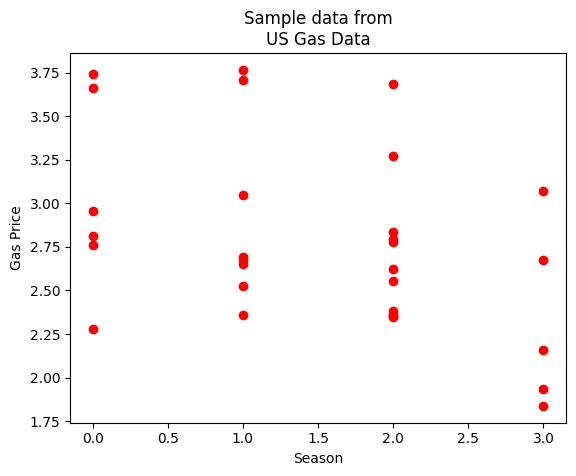

In [ ]:
plt.figure()
plt.scatter(X,Y,color="red")
title=[]
title.append("Sample data from")
title.append("US Gas Data")
plt.title("\n".join(title))
plt.xlabel("Season")
plt.ylabel("Gas Price")

**Plotting all of the data to see how much variance there is by season**

In [ ]:
data_new.Season = [season[i] for i in data_new.Season]

In [ ]:
Xf=data_new.Season.values
Yf=data_new['Weekly U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)'].values

Text(0, 0.5, 'Gas Price')

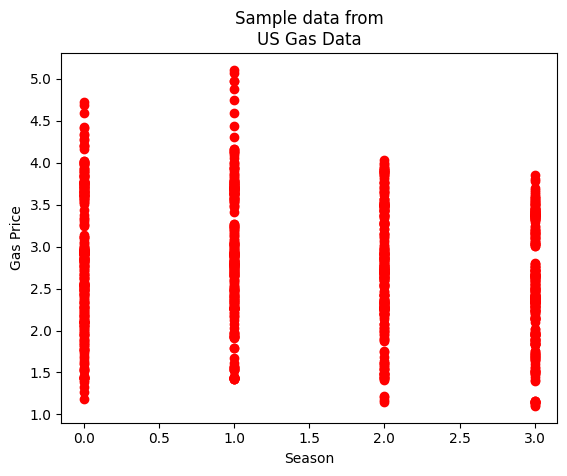

In [ ]:
plt.figure()
plt.scatter(Xf,Yf,color="red")
title=[]
title.append("Sample data from")
title.append("US Gas Data")
plt.title("\n".join(title))
plt.xlabel("Season")
plt.ylabel("Gas Price")

**The seasonal gas price data has an overall low variance where all season's variance is below 1**

In [ ]:
data = data_new[['Weekly U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)', 'Season']]
Spring = data[data['Season']==0]
Summer = data[data['Season']==1]
Fall = data[data['Season']==2]
Winter = data[data['Season']==3]

In [ ]:
Spring.drop(columns=['Season']).std()

Weekly U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)    0.798136
dtype: float64

In [ ]:
Summer.drop(columns=['Season']).std()

Weekly U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)    0.786688
dtype: float64

In [ ]:
Fall.drop(columns=['Season']).std()

Weekly U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)    0.690547
dtype: float64

In [ ]:
Winter.drop(columns=['Season']).std()

Weekly U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)    0.67981
dtype: float64

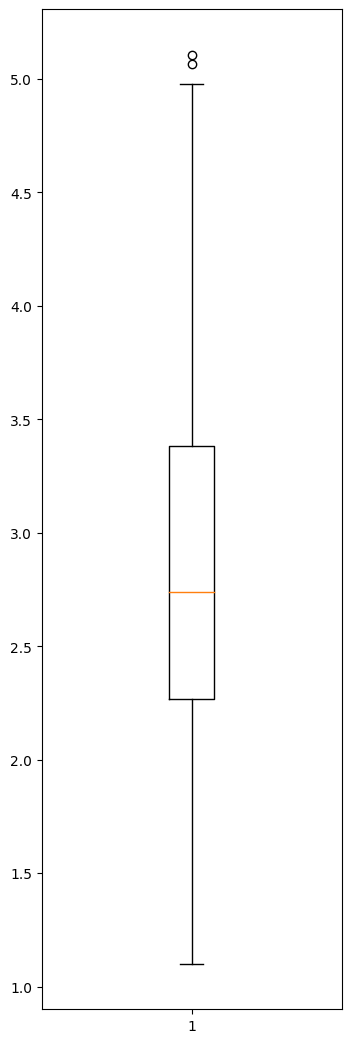

In [ ]:
fig = plt.figure(figsize =(3, 10))
ax = fig.add_axes([0,0,1,1])
bp = ax.boxplot(Yf)
plt.show()

**Plotting a linear regression on Gas Price versus U.S. net exports for Petroleum Products**

In [ ]:
Xt=debugging_dataset['Weekly U.S. Exports of Total Petroleum Products (Thousand Barrels per Day)']/1000
Xt=Xt.values
Yt=debugging_dataset['Weekly U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)'].values
lr=sklearn.linear_model.LinearRegression()
lr.fit(numpy.reshape(Xt,(-1,1)),numpy.reshape(Yt,(-1,1)))
(m_opt,b_opt)=(lr.coef_.item(),lr.intercept_.item())
m_sp,b_sp,_,_,_=scipy.stats.linregress(Xt,Yt)

In [ ]:
Xt.std()

2.2279384215009177

In [ ]:
Yt.std()

0.8725143513623907

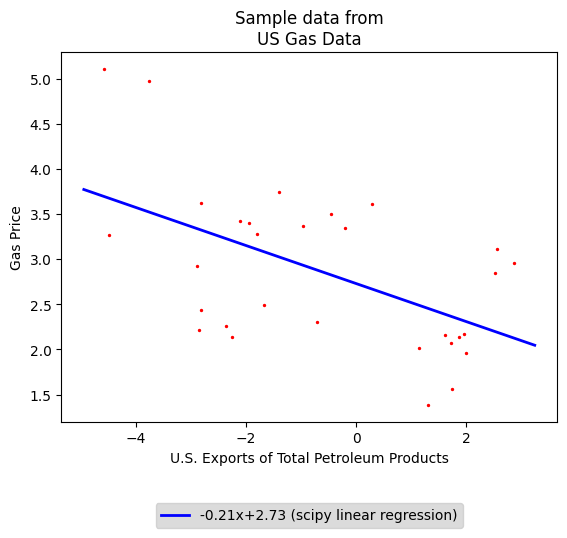

In [ ]:
plt.figure()
plt.scatter(Xt,Yt,color='red',s=2)
xlims=numpy.array(plt.gca().get_xlim())
plt.plot(xlims,m_sp*xlims+b_sp,label="{0:.2f}x+{1:.2f} (scipy linear regression)".format(m_sp,b_sp),color="blue",linewidth=2)
title=[]
title.append("Sample data from")
title.append("US Gas Data")
plt.title("\n".join(title))
plt.xlabel("U.S. Exports of Total Petroleum Products")
plt.ylabel("Gas Price")
legend("bottom")
saver("bestlines")
plt.show()
plt.close()

In [ ]:
Xb=data_new['Weekly U.S. Exports of Total Petroleum Products (Thousand Barrels per Day)']/1000
Xb=Xb.values
Yb=data_new['Weekly U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)'].values
lr=sklearn.linear_model.LinearRegression()
lr.fit(numpy.reshape(Xb,(-1,1)),numpy.reshape(Yb,(-1,1)))
(m_opt,b_opt)=(lr.coef_.item(),lr.intercept_.item())
m_sp,b_sp,_,_,_=scipy.stats.linregress(Xb,Yb)

In [ ]:
Xb.std()

2.1936556399745637

In [ ]:
Yt.std()

0.8725143513623907

U.S. Exports of Total Petroleum Products and Gas Prices are inversely related

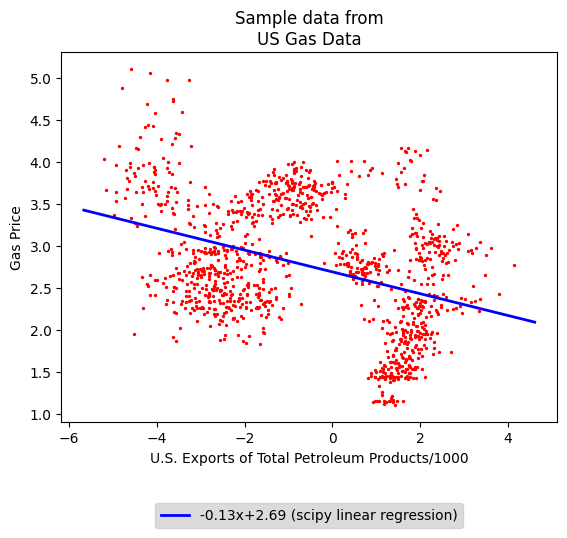

In [ ]:
plt.figure()
plt.scatter(Xb,Yb,color='red',s=2)
xlims=numpy.array(plt.gca().get_xlim())
plt.plot(xlims,m_sp*xlims+b_sp,label="{0:.2f}x+{1:.2f} (scipy linear regression)".format(m_sp,b_sp),color="blue",linewidth=2)
title=[]
title.append("Sample data from")
title.append("US Gas Data")
plt.title("\n".join(title))
plt.xlabel("U.S. Exports of Total Petroleum Products/1000")
plt.ylabel("Gas Price")
legend("bottom")
saver("bestlines")
plt.show()
plt.close()

Looking at the variance of the data set for Gas prices there is not much variance but for the U.S. Export of Total Petroleum products is relatively high with a variance of 2.1 or higher. In both graphs, there are outliers which increase the overall loss and accuracy of the neural network.

**Descriptive statistics**

In [ ]:
y = data_new['Weekly U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)']
print(f'The mean of gasoline price is {y.mean()}')
print(f'The median of gasoline price is {y.median()}')
print(f'The 25% 50% 75% percentile of dataset \n{y.quantile([.25, .5, .75])}')

round(y.describe(),4)

The mean of gasoline price is 2.7686453590192643
The median of gasoline price is 2.741
The 25% 50% 75% percentile of dataset 
0.25    2.26725
0.50    2.74100
0.75    3.38500
Name: Weekly U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon), dtype: float64


count    1142.0000
mean        2.7686
std         0.7549
min         1.1010
25%         2.2672
50%         2.7410
75%         3.3850
max         5.1070
Name: Weekly U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon), dtype: float64